# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os
import matplotlib.pyplot as plt


We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [3]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())

In [4]:
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)

(120, 160, 3)
(120, 120, 3)
(120, 120, 3)


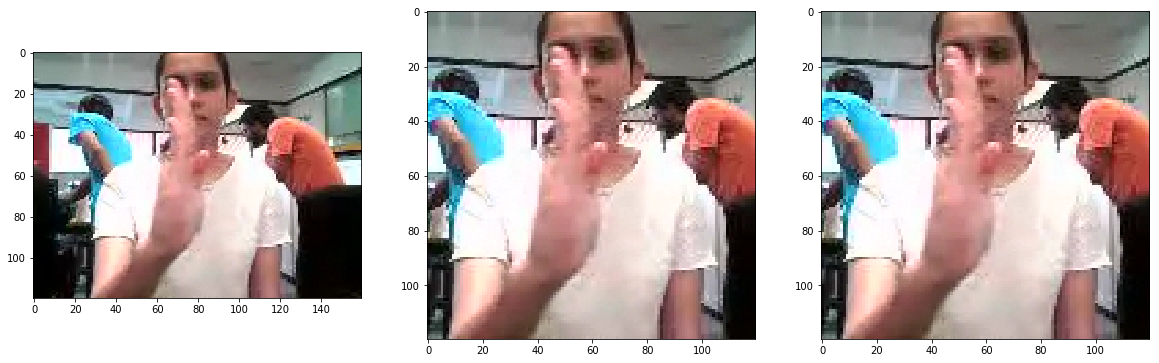

In [5]:
source_path= train_path
folder_list= train_doc
batch_size=30
num_frames=10
image_width=120
image_height=120
fig = plt.figure(figsize=(20, 30))

shapes=[]
cnt_shape={}

img_idx = [x for x in range(0,num_frames)] 
t = np.random.permutation(folder_list)
num_batches = len(t)//batch_size # calculate the number of batches
for batch in range(num_batches): # we iterate over the number of batches
    batch_data = np.zeros((batch_size,num_frames,image_width,image_height,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
    batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
    for folder in range(batch_size): # iterate over the batch_size
        imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
        for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
            image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
            shapes.append(image.shape)
            if image.shape not in cnt_shape.keys():
                cnt_shape[image.shape]=1
            else:
                cnt_shape[image.shape]+=1
            print(image.shape)
            
            if image.shape==(120, 160, 3):
                image_c=image[:,20:140,:]
            elif image.shape==(360, 360, 3):
                image_c=image[30:330,30:330,:]
            print(image_c.shape)
            ax = fig.add_subplot(1, 3, 1)
            plt.imshow(image.astype("uint8"))
            ax = fig.add_subplot(1, 3, 2)
            plt.imshow(image_c.astype("uint8"))
            image_resized = imresize(image_c,(image_width,image_height))
            print(image_resized.shape)
            ax = fig.add_subplot(1, 3, 3)
            plt.imshow(image_resized.astype("uint8"))
            break
        break
    break
# print(len(shapes))
# print(cnt_shape)
# uni_shapes=list(set(shapes))
    
# uni_shapes   


## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [6]:
def generator(source_path, folder_list, batch_size,num_frames,image_width,image_height):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [0,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,29] #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,num_frames,image_width,image_height,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    if image.shape==(120, 160, 3):
                        image_c=image[:,20:140,:]
                    elif image.shape==(360, 360, 3):
                        image_c=image[30:330,30:330,:]
                    else:
                        image_c=image[:,:,:]
                     
                    image_resized = imresize(image_c,(image_width,image_height))
                     
                    image_resized=image_resized/255
                    
                    batch_data[folder,idx,:,:,0] = image_resized[:,:,0]
                    batch_data[folder,idx,:,:,1] = image_resized[:,:,1]
                    batch_data[folder,idx,:,:,2] = image_resized[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        if(len(t)%batch_size) != 0:
            batch_data = np.zeros((batch_size,num_frames,image_width,image_height,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate over the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    if image.shape==(120, 160, 3):
                        image_c=image[:,20:140,:]
                    elif image.shape==(360, 360, 3):
                        image_c=image[30:330,30:330,:]
                    else:
                        image_c=image[:,:,:]
                    image_resized = imresize(image_c,(image_width,image_height))
                    image_resized=image_resized/255
                    
                    batch_data[folder,idx,:,:,0] = image_resized[:,:,0]
                    batch_data[folder,idx,:,:,1] = image_resized[:,:,1]
                    batch_data[folder,idx,:,:,2] = image_resized[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

            


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [7]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences) # 663
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences) # 100


# training sequences = 663
# validation sequences = 100


In [8]:
classes = 5 #left swipe, right swipe, thumbs up, thumbs down, stop
channel = 3 # RGB Colors 

## Models
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [ ]:
# Importing libraries

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from keras.optimizers import Adam
import keras

###  Model Parameters

In [ ]:
num_frames=30 

image_width=120

image_height=120

num_epochs =10

batch_size = 32

lr_val=0.001

#### Neural Network Architecture

In [ ]:
# Input
input_shape=(num_frames,image_width,image_height,3)

# Defining model
model = Sequential()

# for differentiating one image from another, fewer number of bigger filters
model.add(Conv3D(8,kernel_size=(3,3,3), input_shape=input_shape,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))

# edges and broad strokes detection, more big filters
model.add(Conv3D(16, kernel_size=(3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))

# to extract finer details and abstractions, more number of smaller filters
model.add(Conv3D(32,  kernel_size=(1,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(64, kernel_size=(1,3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25)) # adding a sparseness to improve performance
model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

train_generator = generator(train_path, train_doc, batch_size,num_frames,image_width,image_height)
val_generator = generator(val_path, val_doc, batch_size,num_frames,image_width,image_height)

model_name = 'model_init_Final' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1) # write the REducelronplateau code here
callbacks_list = [checkpoint, LR]



W0510 15:00:07.926757 139973643245376 callbacks.py:1071] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of batches seen.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 120, 120, 8)   32        
_________________________________________________________________
activation (Activation)      (None, 30, 120, 120, 8)   0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 60, 60, 16)    64        
_________________________________________________________________
activation_1 (Activation)    (None, 15, 60, 60, 16)    0

In [ ]:

#The steps_per_epoch and validation_steps are used by fit_generator to decide the number of next() calls it needs to make.

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [56]:
batch_size = 10
num_epochs = 10
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 32
Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 2.1018 - categorical_accuracy: 0.2217Source path =  Project_data/val ; batch size = 32

Epoch 00001: val_loss improved from inf to 1.60460, saving model to model_init_Final_2021-05-1001_49_09.490420/model-00001-2.10183-0.22173-1.60460-0.25000.h5
21/21 [==============================] - 63s 3s/step - loss: 2.1018 - categorical_accuracy: 0.2217 - val_loss: 1.6046 - val_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 1.5167 - categorical_accuracy: 0.3185
Epoch 00002: val_loss improved from 1.60460 to 1.55175, saving model to model_init_Final_2021-05-1001_49_09.490420/model-00002-1.51672-0.31845-1.55175-0.25781.h5
21/21 [==============================] - 62s 3s/step - loss: 1.5167 - categorical_accuracy: 0.3185 - val_loss: 1.5518 - val_categorical_accuracy: 0.2578 - lr: 0.0010
Epoch 3/10
21/21 [================

In [14]:
batch_size = 20
num_epochs = 20

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

W0510 02:38:17.947123 139970944988992 deprecation.py:323] From <ipython-input-14-f1793e01c5b7>:16: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Source path =  Project_data/train ; batch size = 20
Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 2.0391 - categorical_accuracy: 0.2412Source path =  Project_data/val ; batch size = 20

Epoch 00001: val_loss improved from inf to 1.60586, saving model to model_init_Final_2021-05-1002_35_48.752204/model-00001-2.03914-0.24118-1.60586-0.18000.h5
34/34 [==============================] - 142s 4s/step - loss: 2.0391 - categorical_accuracy: 0.2412 - val_loss: 1.6059 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.4343 - categorical_accuracy: 0.3368
Epoch 00002: val_loss did not improve from 1.60586
34/34 [==============================] - 61s 2s/step - loss: 1.4343 - categorical_accuracy: 0.3368 - val_loss: 1.6231 - val_categorical_accuracy: 0.1500 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 1.3016 - categorical_accuracy: 0.3971
Epoch 00003: val_loss did not improve 

In [ ]:
batch_size = 32
num_epochs = 30

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

W0510 03:58:46.357461 139960190863168 deprecation.py:323] From <ipython-input-14-341194a3a3f0>:16: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Source path =  Project_data/train ; batch size = 32
Epoch 1/30
21/21 [==============================] - ETA: 0s - loss: 2.1680 - categorical_accuracy: 0.2321Source path =  Project_data/val ; batch size = 32

Epoch 00001: val_loss improved from inf to 1.60812, saving model to model_init_Final_2021-05-1003_57_39.594203/model-00001-2.16802-0.23214-1.60812-0.23438.h5
21/21 [==============================] - 140s 7s/step - loss: 2.1680 - categorical_accuracy: 0.2321 - val_loss: 1.6081 - val_categorical_accuracy: 0.2344 - lr: 0.0010
Epoch 2/30
21/21 [==============================] - ETA: 0s - loss: 1.5739 - categorical_accuracy: 0.2738
Epoch 00002: val_loss improved from 1.60812 to 1.60504, saving model to model_init_Final_2021-05-1003_57_39.594203/model-00002-1.57390-0.27381-1.60504-0.20312.h5
21/21 [==============================] - 67s 3s/step - loss: 1.5739 - categorical_accuracy: 0.2738 - val_loss: 1.6050 - val_categorical_accuracy: 0.2031 - lr: 0.0010
Epoch 3/30
21/21 [===============

In [14]:
batch_size = 16
num_epochs = 40

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

W0510 04:36:07.255624 140710956361536 deprecation.py:323] From <ipython-input-14-73906af4763c>:16: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Source path =  Project_data/train ; batch size = 16
Epoch 1/40
42/42 [==============================] - ETA: 0s - loss: 1.9489 - categorical_accuracy: 0.2396Source path =  Project_data/val ; batch size = 16

Epoch 00001: val_loss improved from inf to 1.60088, saving model to model_init_Final_2021-05-1004_35_19.001775/model-00001-1.94895-0.23958-1.60088-0.19643.h5
42/42 [==============================] - 140s 3s/step - loss: 1.9489 - categorical_accuracy: 0.2396 - val_loss: 1.6009 - val_categorical_accuracy: 0.1964 - lr: 0.0010
Epoch 2/40
42/42 [==============================] - ETA: 0s - loss: 1.3689 - categorical_accuracy: 0.3780
Epoch 00002: val_loss did not improve from 1.60088
42/42 [==============================] - 63s 2s/step - loss: 1.3689 - categorical_accuracy: 0.3780 - val_loss: 1.7502 - val_categorical_accuracy: 0.1964 - lr: 0.0010
Epoch 3/40
42/42 [==============================] - ETA: 0s - loss: 1.1560 - categorical_accuracy: 0.4851
Epoch 00003: val_loss did not improve 

In [ ]:
batch_size = 32
num_epochs = 50

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

W0510 15:00:07.951365 139973643245376 deprecation.py:323] From <ipython-input-14-8d1193dcbd26>:16: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Source path =  Project_data/train ; batch size = 32
Epoch 1/50
34/34 [==============================] - ETA: 0s - loss: 1.9459 - categorical_accuracy: 0.2509Source path =  Project_data/val ; batch size = 32

Epoch 00001: val_loss improved from inf to 1.60795, saving model to model_init_Final_2021-05-1014_59_44.022386/model-00001-1.94592-0.25092-1.60795-0.21875.h5
34/34 [==============================] - 185s 5s/step - loss: 1.9459 - categorical_accuracy: 0.2509 - val_loss: 1.6079 - val_categorical_accuracy: 0.2188 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - ETA: 0s - loss: 1.4514 - categorical_accuracy: 0.3557
Epoch 00002: val_loss did not improve from 1.60795
34/34 [==============================] - 101s 3s/step - loss: 1.4514 - categorical_accuracy: 0.3557 - val_loss: 1.6889 - val_categorical_accuracy: 0.2375 - lr: 0.0010
Epoch 3/50
34/34 [==============================] - ETA: 0s - loss: 1.2069 - categorical_accuracy: 0.4568
Epoch 00003: val_loss did not improve